In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [6]:
def plot_decision_regions_2class(model, dataset):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_dark = ListedColormap(['#FF0000', '#00FF)0', '#00AAFF'])
    x = dataset.x.numpy()
    y = dataset.y.numpy()
    h = .02
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _xx_ = torch.tensor(np.c_[xx.ravel(), yy.ravel()])
    y_hat = np.logical_not((model(_xx_)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [7]:
def accuracy(model, datset):
    return np.mean(dataset.y.view(-1).numpy() == (model(dataset.x)[:, 0] > 0.5).numpy())

In [8]:
class Net(nn.Module):
    def __init__(self, input_l, hidden_l, output_l):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(input_l, hidden_l)
        self.linear2 = nn.Linear(hidden_l, output_l)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [9]:
def train(dataset, model, criterion, train_loader, optimizer, epochs = 5):
    cost = []
    acc = []
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
        acc.append(accuracy(model, dataset))
        cost.append(total)
    fig, ax1 = plt.subplot()
    color = 'tab:red'
    ax1.plot(cost, color = color)
    ax1.set_xlabel('epoch', color = color)
    ax1.set_ylabel('total loss', color = color)
    ax1.tick_params(axis = 'y', color = color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(acc, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    return cost

In [19]:
# Define the class XOR_Data

class xor_Data(Dataset):
    
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

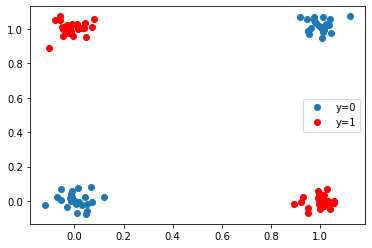

In [20]:
dataset = xor_data()
dataset.plot_stuff()

In [21]:
network = Net(1, 1, 1)

In [22]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = dataset, batch_size = 1)
loss12 = train(dataset, network, criterion, train_loader, optimizer, epochs = 500)
plot_decision_regions_2class(network, dataset)

RuntimeError: size mismatch, m1: [1 x 2], m2: [1 x 1] at C:\Users\builder\AppData\Local\Temp\pip-req-build-9msmi1s9\aten\src\TH/generic/THTensorMath.cpp:197